In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [32]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [33]:
x = data.iloc[: , :-1]
y = data['Purchased']

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [36]:
x.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier(criterion='entropy' , max_depth=3)

In [62]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
dt.score(x_test , y_test)*100

91.25

In [64]:
dt.score(x_train , y_train)*100 # training accuracy bohot jyada hai yaani data overfitted hai 
# if data is overfitted then we have to do pruning 

91.875

In [65]:
from sklearn.tree import plot_tree

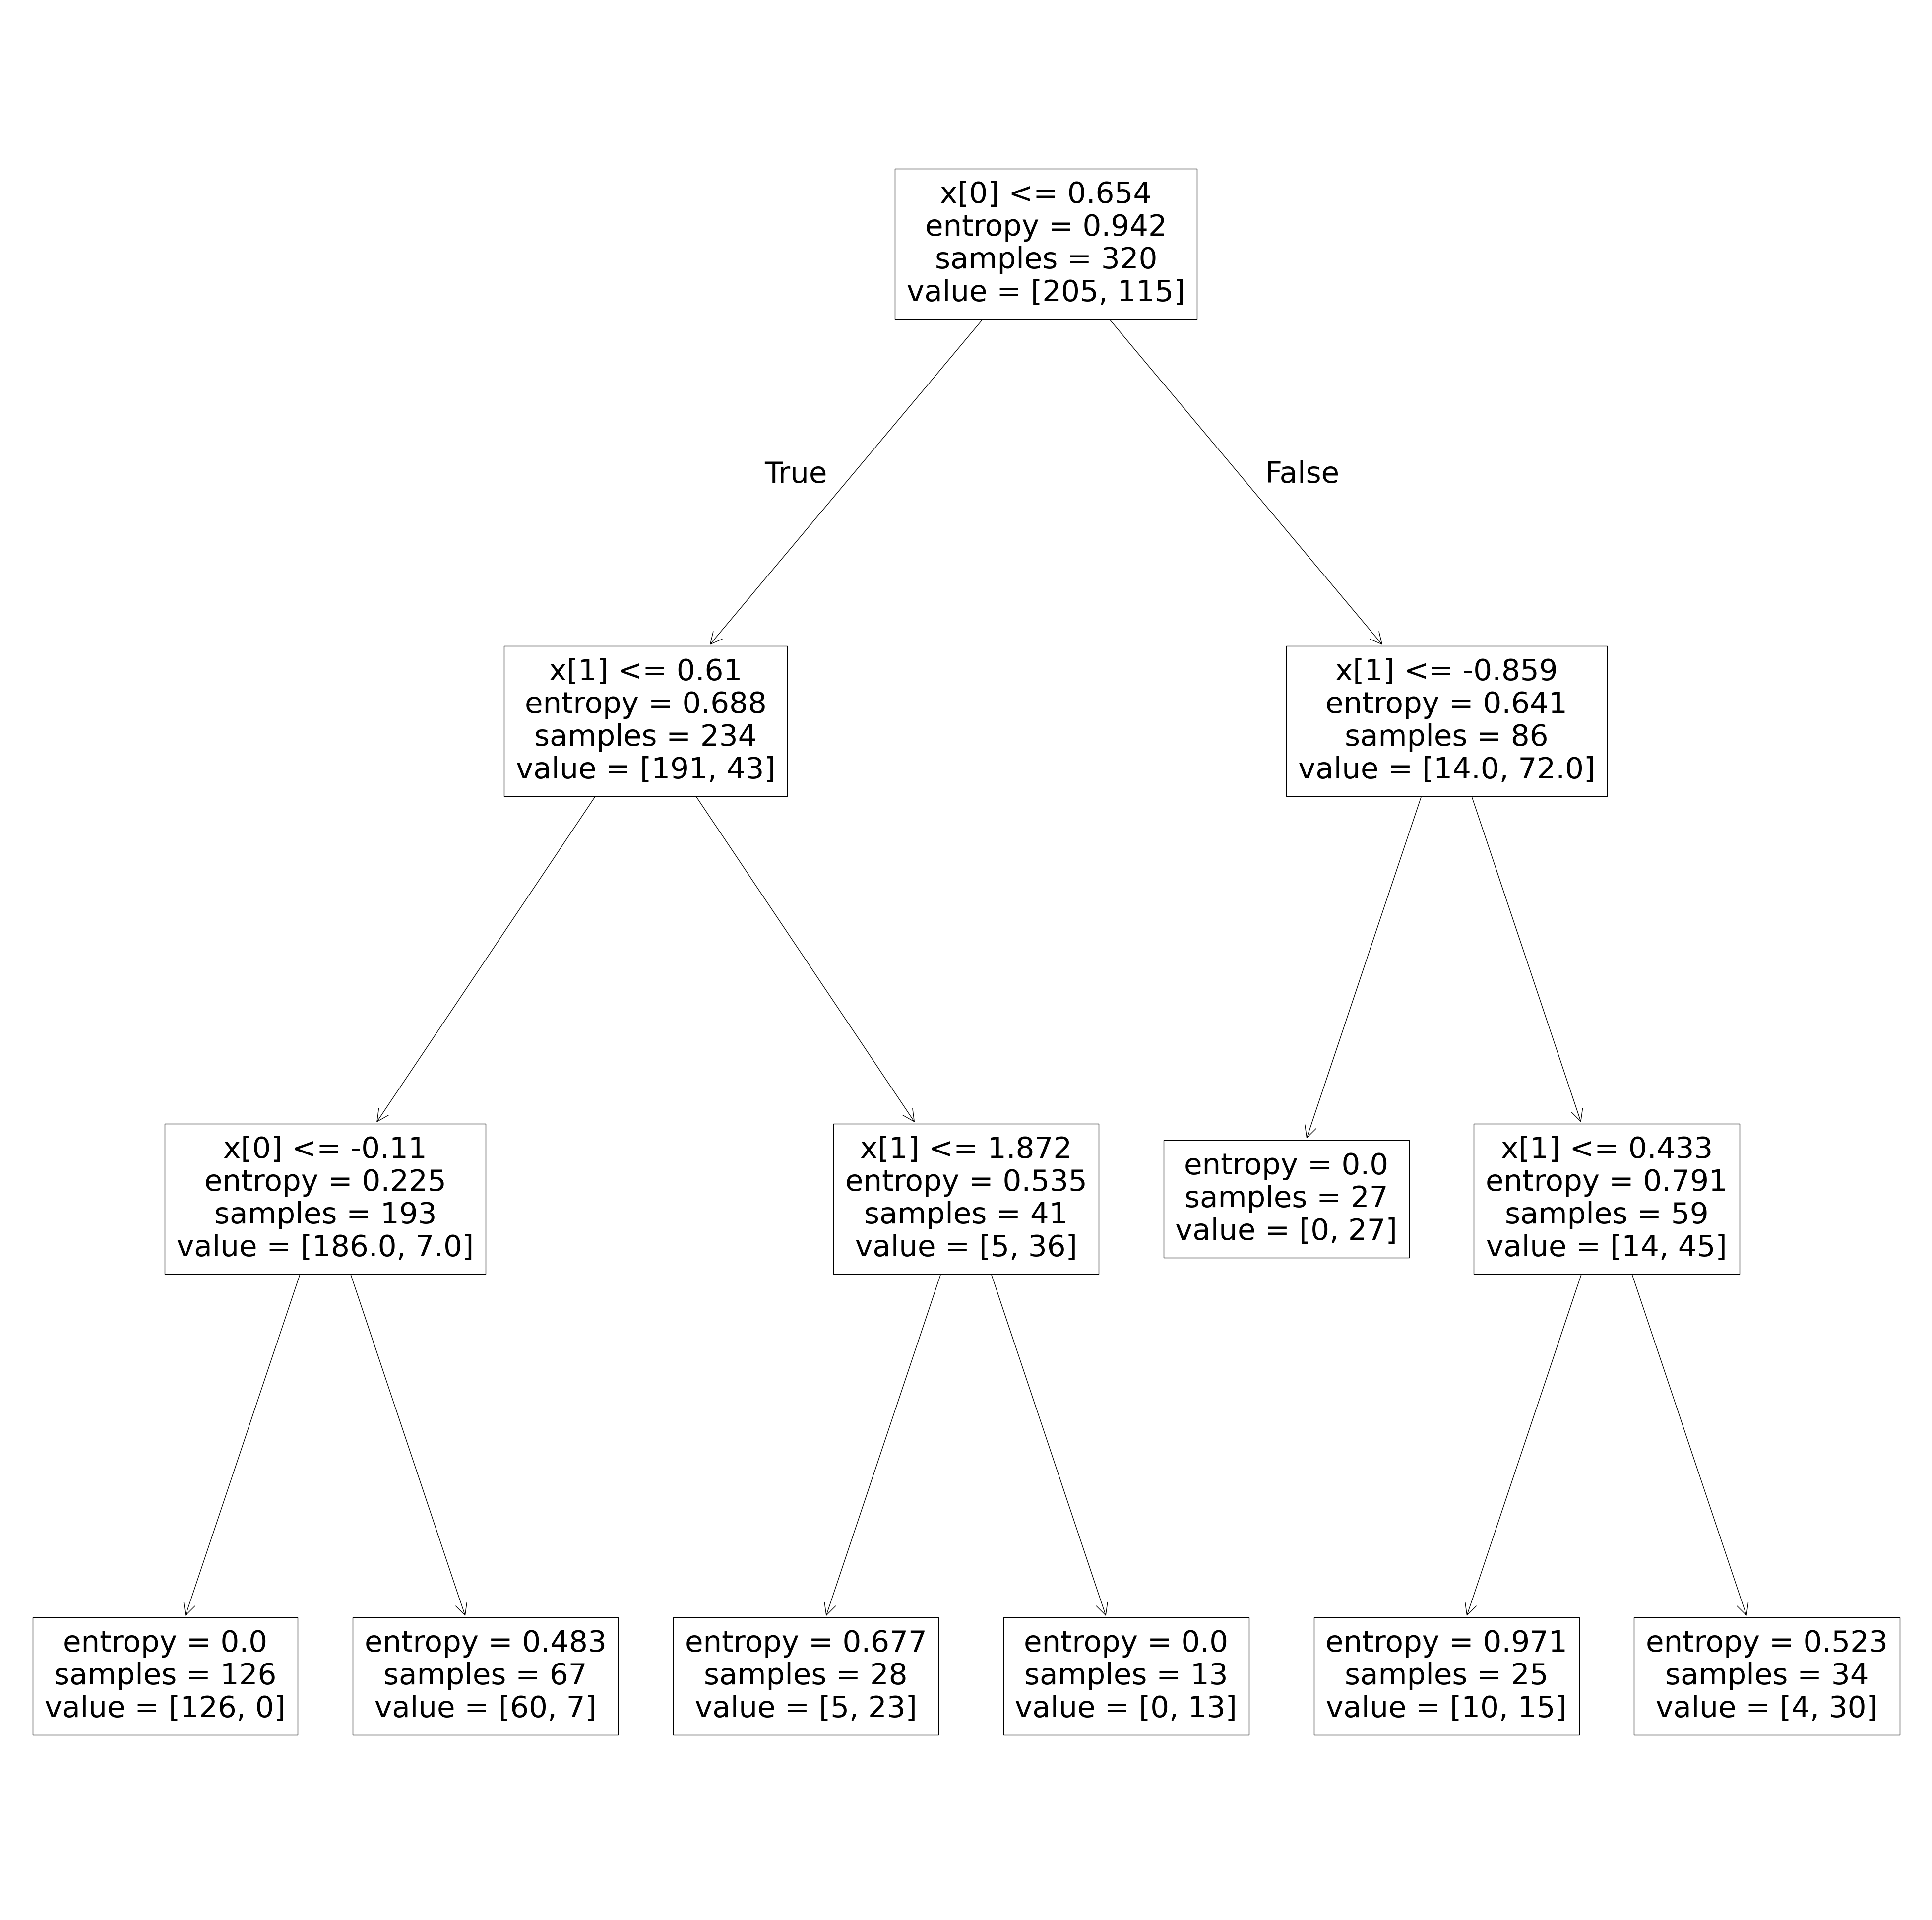

In [66]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show()

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

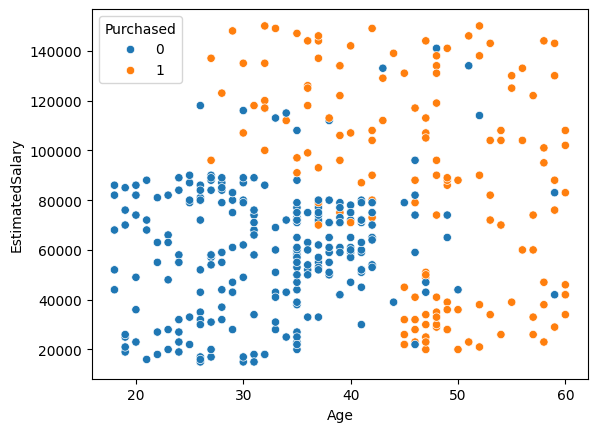

In [67]:
sns.scatterplot(x = 'Age' , y = 'EstimatedSalary' , data = data , hue = 'Purchased')

In [68]:
from mlxtend.plotting import plot_decision_regions

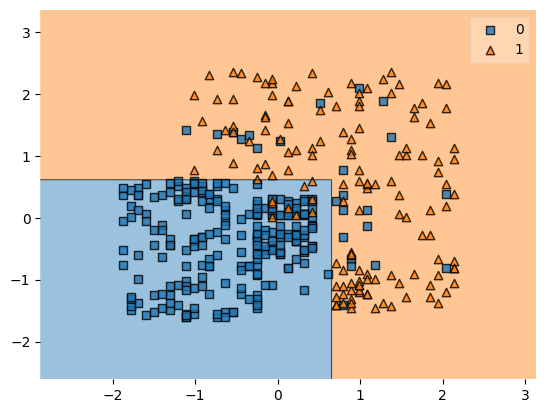

In [69]:
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf = dt)
plt.show()

In [70]:
# post pruning 
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train) , dt2.score(x_test,y_test) , i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.996875 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [71]:
# here we can see on 2 and 3 iteraton the diff is very less 
